In [1]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [3]:
train_dir = os.path.join(os.getcwd(), 'train\\train_set')  # contains 40000 images
validation_dir = os.path.join(os.getcwd(), 'train\\validation_set')  #contains 5000 images
test_dir = os.path.join(os.getcwd(), 'train\\test_set')  #contains 5000 images
training_labels_df = pd.read_csv('C:\\Users\\M1047249\\Documents\\Intel openvino\\nn assignment\\train\\trainLabels.csv')

In [4]:
print('train data size : ', len(os.listdir(train_dir)))
print('validation data size: ', len(os.listdir(validation_dir)))
print('test data size : ', len(os.listdir(test_dir)))
print('training labels size : ', len(training_labels_df))

train data size :  40000
validation data size:  5000
test data size :  5000
training labels size :  50000


In [5]:
training_labels_df = training_labels_df.astype(str)

In [6]:
training_labels_df['id'] = training_labels_df['id']+'.png'

In [18]:
batch_size = 128
test_batch_size=100
epochs = 15
# image property is 32x32 pixel
IMG_HEIGHT = 32
IMG_WIDTH = 32

total_train=len(os.listdir(train_dir))
total_validation=len(os.listdir(validation_dir))
total_test=len(os.listdir(test_dir))

In [8]:
train_data_gen = ImageDataGenerator(rescale = 1./255)
validation_data_gen = ImageDataGenerator(rescale = 1./255)
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [53]:
train_generator = train_data_gen.flow_from_dataframe(batch_size=batch_size,
                                               directory= train_dir,
                                               dataframe = training_labels_df.iloc[:40000, :],
                                               x_col='id',
                                               y_col='label',
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               class_mode='categorical')


Found 40000 validated image filenames belonging to 10 classes.


In [54]:
validation_generator = validation_data_gen.flow_from_dataframe(batch_size=batch_size,
                                               directory= validation_dir,
                                               dataframe = training_labels_df.iloc[40000:45000,:],
                                               x_col='id',
                                               y_col='label',
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               class_mode='categorical')

Found 5000 validated image filenames belonging to 10 classes.


In [55]:
# Note - test batch size of step should absolutely divide total_test
test_generator = test_data_gen.flow_from_dataframe(batch_size=test_batch_size,
                                               directory= test_dir,
                                               dataframe = training_labels_df.iloc[45000:,:],
                                               x_col='id',
                                               y_col= None,
                                               shuffle=False,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               class_mode=None)

Found 5000 validated image filenames.


### Model Building

In [56]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', padding='same', name='conv_1', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2,2), name='max_pool_1'))

model.add(Conv2D(32, (3,3), activation='relu', padding='same', name='conv_2'))
model.add(MaxPooling2D((2,2), name='max_pool_2'))

model.add(Conv2D(64, (3,3), activation='relu', padding='same', name='conv_3'))
model.add(MaxPooling2D((2,2), name='max_pool_3'))

model.add(Conv2D(128, (3,3), activation='relu', padding='same', name='conv_4'))
model.add(MaxPooling2D((2,2), name='max_pool_4'))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(512, activation='relu', name='dense_1'))

model.add(Dense(10, activation='softmax', name='output'))

In [57]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 16, 16, 16)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 8, 8, 32)          0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pool_3 (MaxPooling2D)    (None, 4, 4, 64)          0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 4, 4, 128)        

### Model training

In [59]:
history = model.fit(
    train_generator,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validation // batch_size,
    verbose=1
)

Train for 312 steps, validate for 39 steps
Epoch 1/15
312/312 [==============================] - 81s 260ms/step - loss: 1.8091 - accuracy: 0.3308 - val_loss: 1.5377 - val_accuracy: 0.4363
Epoch 2/15
312/312 [==============================] - 72s 229ms/step - loss: 1.4687 - accuracy: 0.4647 - val_loss: 1.3294 - val_accuracy: 0.5192
Epoch 3/15
312/312 [==============================] - 75s 239ms/step - loss: 1.3157 - accuracy: 0.5267 - val_loss: 1.1901 - val_accuracy: 0.5699
Epoch 4/15
312/312 [==============================] - 70s 225ms/step - loss: 1.2062 - accuracy: 0.5657 - val_loss: 1.1882 - val_accuracy: 0.5787
Epoch 5/15
312/312 [==============================] - 70s 225ms/step - loss: 1.1186 - accuracy: 0.5981 - val_loss: 1.0506 - val_accuracy: 0.6270
Epoch 6/15
312/312 [==============================] - 71s 229ms/step - loss: 1.0524 - accuracy: 0.6265 - val_loss: 1.0441 - val_accuracy: 0.6348
Epoch 7/15
312/312 [==============================] - 80s 255ms/step - loss: 0.9913 - a

In [60]:
# 4 conv, flatten, dropout, dense and output , epoch 15, without augmentation
model.save('image_classifier_without_augmentation.h5') 

### Model Evaluation

In [61]:
model.metrics_names

['loss', 'accuracy']

In [62]:
score = model.evaluate_generator(generator=validation_generator, steps=total_validation // batch_size)
score


[0.86503022756332, 0.6995192]

### Model Predictions

In [64]:
test_generator.reset()
prediction=model.predict_generator(test_generator,
                                   steps=total_test // test_batch_size,
                                   verbose=1)

50/50 [==============================] - 7s 141ms/step


In [65]:
predicted_class_indices=np.argmax(prediction,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [66]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results_without_augmentation.csv",index=False)

### Visualizing Training Results

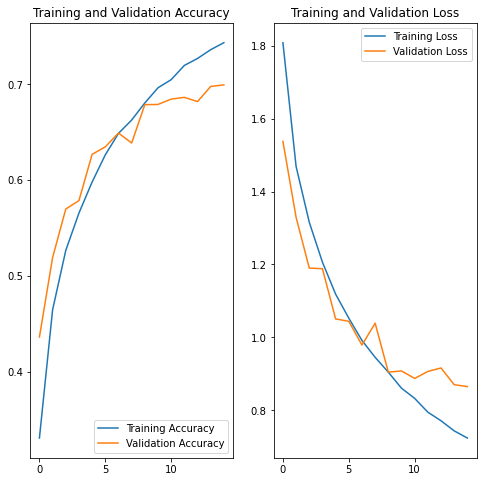

In [67]:
# Before data Augmentation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Training with Data Augmentation

In [19]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [20]:
train_generator = train_data_gen.flow_from_dataframe(batch_size=batch_size,
                                               directory= train_dir,
                                               dataframe = training_labels_df.iloc[:40000, :],
                                               x_col='id',
                                               y_col='label',
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               class_mode='categorical')

Found 40000 validated image filenames belonging to 10 classes.


In [21]:
validation_generator = validation_data_gen.flow_from_dataframe(batch_size=batch_size,
                                               directory= validation_dir,
                                               dataframe = training_labels_df.iloc[40000:45000,:],
                                               x_col='id',
                                               y_col='label',
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               class_mode='categorical')

Found 5000 validated image filenames belonging to 10 classes.


In [22]:
test_generator = test_data_gen.flow_from_dataframe(batch_size=test_batch_size,
                                               directory= test_dir,
                                               dataframe = training_labels_df.iloc[45000:,:],
                                               x_col='id',
                                               y_col= None,
                                               shuffle=False,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               class_mode=None)

Found 5000 validated image filenames.


In [72]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

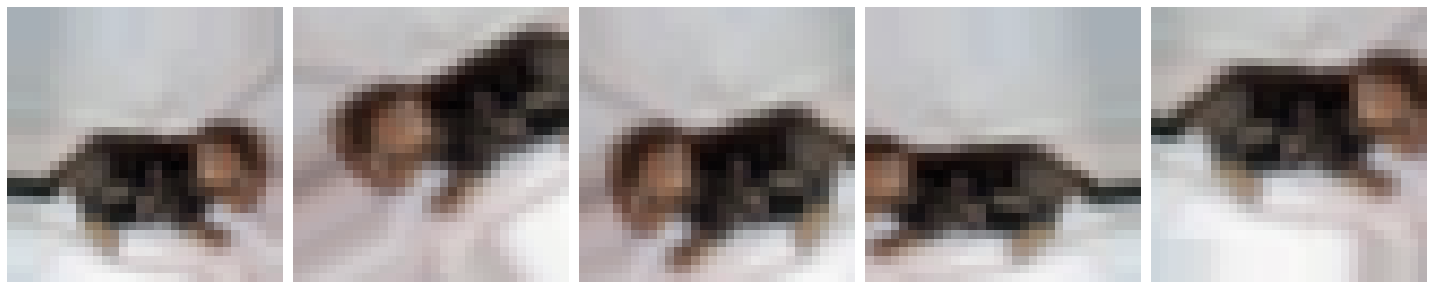

In [73]:
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Model Building

In [23]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', padding='same', name='conv_1', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2,2), name='max_pool_1'))

model.add(Conv2D(32, (3,3), activation='relu', padding='same', name='conv_2'))
model.add(MaxPooling2D((2,2), name='max_pool_2'))

model.add(Conv2D(64, (3,3), activation='relu', padding='same', name='conv_3'))
model.add(MaxPooling2D((2,2), name='max_pool_3'))

model.add(Conv2D(128, (3,3), activation='relu', padding='same', name='conv_4'))
model.add(MaxPooling2D((2,2), name='max_pool_4'))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(512, activation='relu', name='dense_1'))

model.add(Dense(10, activation='softmax', name='output'))

In [24]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 16, 16, 16)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 8, 8, 32)          0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pool_3 (MaxPooling2D)    (None, 4, 4, 64)          0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 4, 4, 128)        

### Model Training

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validation // batch_size,
    verbose=1
)

Train for 312 steps, validate for 39 steps
Epoch 1/15
312/312 [==============================] - 163s 524ms/step - loss: 1.9949 - accuracy: 0.2647 - val_loss: 1.9179 - val_accuracy: 0.3197
Epoch 2/15
312/312 [==============================] - 110s 353ms/step - loss: 1.7510 - accuracy: 0.3614 - val_loss: 1.4947 - val_accuracy: 0.4655
Epoch 3/15
312/312 [==============================] - 104s 334ms/step - loss: 1.6332 - accuracy: 0.4080 - val_loss: 1.4245 - val_accuracy: 0.4858
Epoch 4/15
312/312 [==============================] - 119s 383ms/step - loss: 1.5626 - accuracy: 0.4357 - val_loss: 1.3077 - val_accuracy: 0.5284
Epoch 5/15
312/312 [==============================] - 162s 518ms/step - loss: 1.5130 - accuracy: 0.4514 - val_loss: 1.3318 - val_accuracy: 0.5268
Epoch 6/15
312/312 [==============================] - 154s 495ms/step - loss: 1.4704 - accuracy: 0.4707 - val_loss: 1.2453 - val_accuracy: 0.5583
Epoch 7/15
312/312 [==============================] - 132s 423ms/step - loss: 1.4

In [27]:
 # 4 conv, flatten, dropout, dense and output , epoch 15, data augmentation
model.save('image_classifier_with_augmentation.h5') 

### Model Evaluation

In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
score = model.evaluate_generator(generator=validation_generator, steps=total_validation // batch_size)
score

[1.1249307149495833, 0.59455127]

### Model Predictions

In [30]:
test_generator.reset()
prediction=model.predict_generator(test_generator,
                                   steps=total_test // test_batch_size,
                                   verbose=1)

50/50 [==============================] - 8s 167ms/step


In [31]:
predicted_class_indices=np.argmax(prediction,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [32]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results_with_augmentation.csv",index=False)

### Visualizing Training Predictions

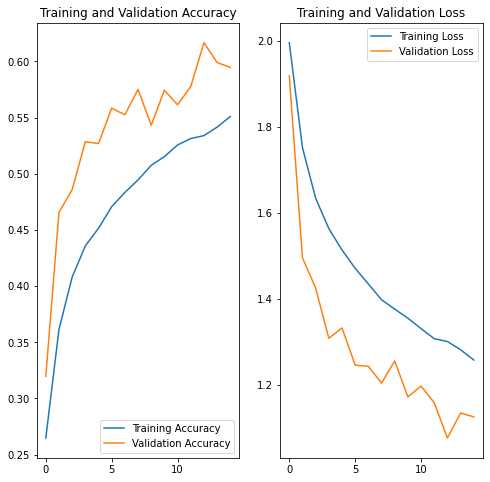

In [33]:
#After data augmentation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
def save_history(history, fn):
    with open(fn, 'wb') as fw:
        pickle.dump(history.history, fw, protocol=2)

In [37]:
save_history(history, 'history_augmented.bin')

In [41]:
def load_history(fn):
    with open(fn, 'rb') as fr:
        history.history = pickle.load(fr)
    return history

In [50]:
def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['accuracy'])
    acc = smooth_curve(history.history['accuracy'][:steps])
    val_acc = smooth_curve(history.history['val_accuracy'][:steps])
    loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])
    
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(val_loss, c='#0f9d58', label='Val Loss')
    plt.xticks(range(0, len(loss), 5))
    plt.xlim(0, len(loss))
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    

    plt.subplot(1, 2, 2)
    plt.plot(acc, c='#0c7cba', label='Train Acc')
    plt.plot(val_acc, c='#0f9d58', label='Val Acc')
    plt.xticks(range(0, len(acc), 5))
    plt.xlim(0, len(acc))
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()

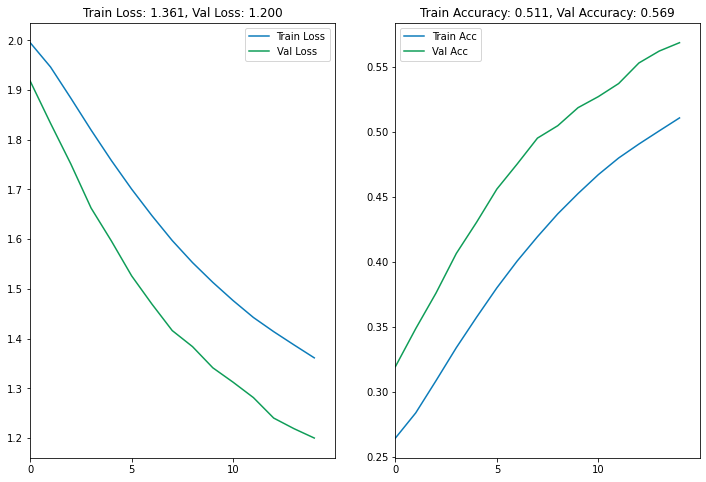

In [51]:
history = load_history('history_augmented.bin')
plot_compare(history)